In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, accuracy_score,make_scorer
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [7]:
# importing df 
data = pd.read_csv('movieReplicationSet.csv')
data.iloc[896]

The Life of David Gale (2003)                                              NaN
Wing Commander (1999)                                                      NaN
Django Unchained (2012)                                                    NaN
Alien (1979)                                                               NaN
Indiana Jones and the Last Crusade (1989)                                  NaN
                                                                          ... 
Movies change my position on social economic or political issues           NaN
When watching movies things get so intense that I have to stop watching    NaN
Gender identity (1 = female; 2 = male; 3 = self-described)                 NaN
Are you an only child? (1: Yes; 0: No; -1: Did not respond)               -1.0
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)        -1.0
Name: 896, Length: 477, dtype: float64

In [8]:
imputed_df = data.copy()  
movie_means = data.iloc[:, :400].mean()
user_means = data.iloc[:, :400].mean(axis=1)

for i in range(data.shape[0]):
    for j in range(400):
        if pd.isna(data.iloc[i, j]):
            if pd.isna(user_means[i]):
                # If the entire row is NaN, use column mean
                imputed_value = movie_means[j]
            else:
                imputed_value = (user_means[i] + movie_means[j]) / 2
            imputed_df.iloc[i, j] = imputed_value

imputed_df.shape

(1097, 477)

In [9]:
imputed_df.head()

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1


In [5]:
imputed_df.isnull().values.any()

True

Q1
For each of the 400 movies, use a simple linear regression model to predict the ratings. Use the ratings 
of the *other* 399 movies in the dataset to predict the ratings of each movie (that means you’ll have 
to build 399 models for each of the 400 movies). For each of the 400 movies, find the movie that 
predicts ratings the best. Then report the average COD of those 400 simple linear regression models. 
Please include a histogram of these 400 COD values and a table with the 10 movies that are most 
easily predicted from the ratings of a single other movie and the 10 movies that are hardest to predict 
from the ratings of a single other movie (and their associated COD values, as well as which movie 
ratings are the best predictor, so this table should have 3 columns).

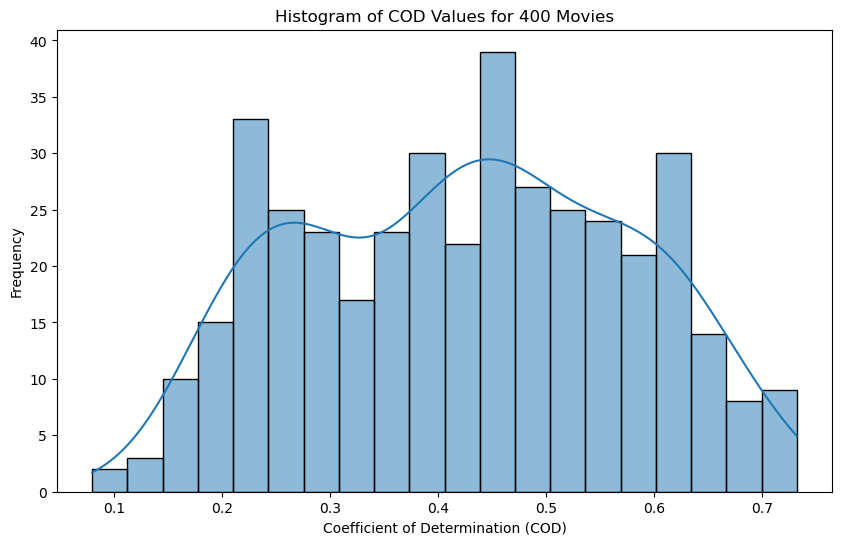

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'imputed_df' is your DataFrame with imputed values

# Initialize a dictionary to store the best predictor for each movie and its COD
best_predictors = {}

# Iterate over each movie to create a regression model
for target_movie in range(400):
    best_cod = -1
    best_predictor = None
    
    # Iterate over all possible predictor movies
    for predictor_movie in range(400):
        if predictor_movie != target_movie:
            # Prepare the predictor and target data
            X = imputed_df.iloc[:, predictor_movie].values.reshape(-1, 1)
            y = imputed_df.iloc[:, target_movie].values
            
            # Linear regression model
            model = LinearRegression().fit(X, y)
            predictions = model.predict(X)
            cod = r2_score(y, predictions)
            
            # Check if this predictor has the best COD so far
            if cod > best_cod:
                best_cod = cod
                best_predictor = predictor_movie

    # Store the best predictor and its COD for the current target movie
    best_predictors[target_movie] = (best_predictor, best_cod)

# Calculate the average COD
average_cod = sum([value[1] for value in best_predictors.values()]) / 400

# Create a histogram of COD values
cod_values = [value[1] for value in best_predictors.values()]
plt.figure(figsize=(10, 6))
sns.histplot(cod_values, bins=20, kde=True)
plt.title('Histogram of COD Values for 400 Movies')
plt.xlabel('Coefficient of Determination (COD)')
plt.ylabel('Frequency')
plt.show()

# Prepare the table for 10 most and least predictable movies
sorted_predictors = sorted(best_predictors.items(), key=lambda x: x[1][1], reverse=True)
top_10_predictable = sorted_predictors[:10]
least_10_predictable = sorted_predictors[-10:]

# Creating DataFrame for the table
predictability_table = pd.DataFrame(top_10_predictable + least_10_predictable, 
                                    columns=['Movie', 'Best Predictor and COD'])


In [7]:
# Assuming 'imputed_df' is your DataFrame with imputed values and movie names as column headers
movie_names = imputed_df.columns[:400]

# Selected movies (10 best and 10 least predictable)
selected_movies_indices = [movie for movie, _ in top_10_predictable + least_10_predictable]

# Lists to store movie details
movie_list = []
best_predictor_list = []
cod_list = []

for movie_index in selected_movies_indices:
    movie_name = movie_names[movie_index]
    best_predictor_index, cod = best_predictors[movie_index]
    best_predictor_name = movie_names[best_predictor_index]
    
    # Append details to the lists
    movie_list.append(movie_name)
    best_predictor_list.append(best_predictor_name)
    cod_list.append(cod)

# Create a DataFrame using the lists
detailed_movies = pd.DataFrame({
    'Movie': movie_list,
    'Best Predictor': best_predictor_list,
    'COD': cod_list
})

# Display the DataFrame
print(detailed_movies)



                              Movie  \
0            Erik the Viking (1989)   
1                       I.Q. (1994)   
2                The Lookout (2007)   
3                     Patton (1970)   
4                 The Bandit (1996)   
5            Best Laid Plans (1999)   
6                      Congo (1995)   
7         The Straight Story (1999)   
8         The Final Conflict (1981)   
9                        Ran (1985)   
10               Grown Ups 2 (2013)   
11  The Fast and the Furious (2001)   
12            13 Going on 30 (2004)   
13                   Titanic (1997)   
14                La La Land (2016)   
15    The Cabin in the Woods (2012)   
16                  Clueless (1995)   
17                Black Swan (2010)   
18              Interstellar (2014)   
19                    Avatar (2009)   

                               Best Predictor       COD  
0                                 I.Q. (1994)  0.731789  
1                      Erik the Viking (1989)  0.731789  
2     

Q2
For the 10 movies that are best and least well predicted from the ratings of a single other movie (so 
20 in total), build multiple regression models that include gender identity (column 475), sibship status 
(column 476) and social viewing preferences (column 477) as additional predictors (in addition to the 
best predicting movie from question 1). Comment on how R^2 has changed relative to the answers 
in question 1. Please include a figure with a scatterplot where the old COD (for the simple linear 
regression models from the previous question) is on the x-axis and the new R^2 (for the new multiple 
regression models) is on the y-axis.

In [8]:
imputed_df = imputed_df.fillna(imputed_df.mean())

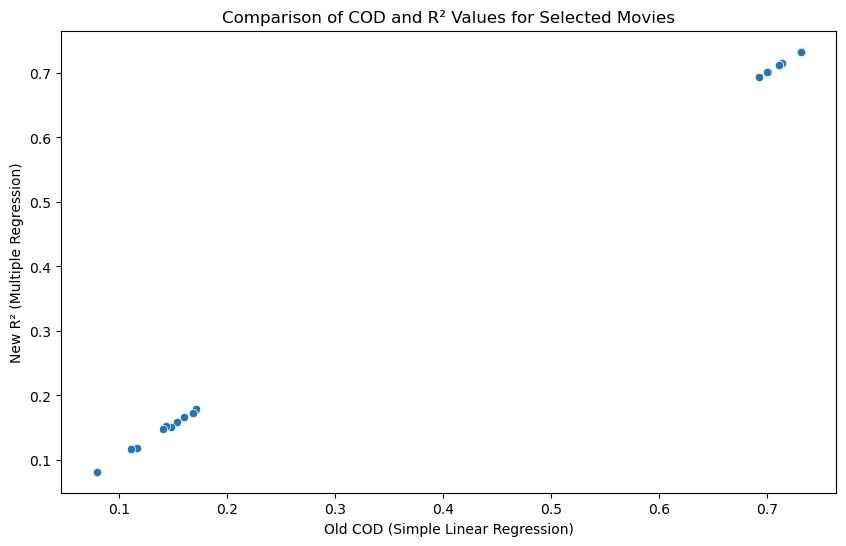

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming 'imputed_df' is your DataFrame with imputed values

# Select the 20 movies based on previous analysis (10 best and 10 least predictable)
selected_movies = top_10_predictable + least_10_predictable  # Using the output from the previous code

# Additional predictors columns
additional_predictors = [474, 475, 476]  # Gender, sibship status, social viewing preferences

# Initialize a dictionary to store new R² values
new_r2_values = {}

# Building multiple regression models for the selected movies
for movie, (best_predictor, old_cod) in selected_movies:
    # Prepare the predictor data (best predicting movie ratings + additional predictors)
    X = imputed_df.iloc[:, [best_predictor] + additional_predictors]
    # Target data
    y = imputed_df.iloc[:, movie]

    # Multiple regression model
    model = LinearRegression().fit(X, y)
    predictions = model.predict(X)
    new_r2 = r2_score(y, predictions)

    # Store the new R² value
    new_r2_values[movie] = new_r2

# Prepare data for the scatterplot
old_cod_values = [old_cod for _, (_, old_cod) in selected_movies]
new_r2_list = list(new_r2_values.values())

# Create a scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=old_cod_values, y=new_r2_list)
plt.title('Comparison of COD and R² Values for Selected Movies')
plt.xlabel('Old COD (Simple Linear Regression)')
plt.ylabel('New R² (Multiple Regression)')
plt.show()

# Analysis and comment on the change in R² values relative to COD


Q3 
Pick 30 movies in the middle of the COD range, as identified by question 1 (that were not used in 
question 2). Now build a regularized regression model with the ratings from 10 other movies (picked 
randomly, or deliberately by you) as an input. Please use ridge regression, and make sure to do 
suitable hyperparameter tuning. Also make sure to report the RMSE for each of these 30 movies in a 
table, after doing an 80/20 train/test split. Comment on the hyperparameters you use and betas you 
find by doing so.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'imputed_df' and 'best_predictors' from previous questions

# Select 30 movies in the middle of the COD range
sorted_cod_movies = sorted(best_predictors.items(), key=lambda x: x[1][1])
middle_cod_movies = sorted_cod_movies[185:215]  # Adjust indices based on your sorting

# Lists to store movie details, RMSE values, and best alphas
movie_list = []
rmse_list = []
alpha_list = []

# For each selected movie
for movie_index, _ in middle_cod_movies:
    # Pick 10 other movies randomly or deliberately
    # random might choose themselves as predictor
    predictor_indices = np.random.choice(range(400), 10, replace=False)
    predictor_indices = [i for i in predictor_indices if i != movie_index]  # Exclude the target movie

    # Split the data into training and testing sets (80/20 split)
    X = imputed_df.iloc[:, predictor_indices]
    y = imputed_df.iloc[:, movie_index]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Hyperparameter tuning for Ridge Regression
    parameters = {'alpha': np.logspace(-3, 3, 100)}
    ridge = Ridge()
    clf = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error')
    clf.fit(X_train, y_train)

    # Best hyperparameter and model
    best_alpha = clf.best_params_['alpha']
    best_model = clf.best_estimator_

    # Predict on the test set and calculate RMSE
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Append details to the lists
    movie_list.append(imputed_df.columns[movie_index])
    rmse_list.append(rmse)
    alpha_list.append(best_alpha)

# Create a DataFrame using the lists
rmse_alpha_df = pd.DataFrame({
    'Movie': movie_list,
    'RMSE': rmse_list,
    'Best Alpha': alpha_list
})

# Display the RMSE and Alpha DataFrame
print(rmse_alpha_df)


                                           Movie      RMSE  Best Alpha
0                   Gone in Sixty Seconds (2000)  0.354793   40.370173
1                              Crossroads (2002)  0.362352   61.359073
2   Austin Powers: The Spy Who Shagged Me (1999)  0.652597   81.113083
3             Austin Powers in Goldmember (2002)  0.520975   93.260335
4                              Goodfellas (1990)  0.334897   70.548023
5                        The Big Lebowski (1998)  0.292164   46.415888
6                                 Twister (1996)  0.262092   13.219411
7                     Blues Brothers 2000 (1998)  0.318513   40.370173
8                      Dances with Wolves (1990)  0.335867   40.370173
9                           28 Days Later (2002)  0.346750   17.475284
10                         Knight and Day (2010)  0.414882   26.560878
11                          The Evil Dead (1981)  0.434533   40.370173
12                          The Machinist (2004)  0.292512   40.370173
13    

In [99]:
middle_cod_movies

[(76, (101, 0.41131831402185437)),
 (62, (63, 0.412782198682794)),
 (219, (316, 0.41413385046000095)),
 (316, (219, 0.41413385046000095)),
 (209, (395, 0.4156983963557901)),
 (305, (116, 0.41743066146431074)),
 (397, (109, 0.41901548159340907)),
 (79, (101, 0.42185968117331507)),
 (145, (260, 0.42366250182927034)),
 (321, (363, 0.4238570244714268)),
 (213, (233, 0.426955129456668)),
 (167, (116, 0.42877283684204937)),
 (11, (116, 0.428841383602498)),
 (210, (195, 0.42890221509567594)),
 (104, (298, 0.42896624228562796)),
 (352, (355, 0.4313556305603228)),
 (355, (352, 0.4313556305603228)),
 (323, (358, 0.43292449570676306)),
 (70, (68, 0.438385969672341)),
 (333, (363, 0.4386925311955897)),
 (69, (68, 0.4391922134156515)),
 (122, (101, 0.4393551201925192)),
 (8, (86, 0.44075065655060564)),
 (92, (15, 0.4435339460442921)),
 (317, (384, 0.4436738669703779)),
 (384, (317, 0.44367386697037803)),
 (178, (196, 0.4437759082183801)),
 (308, (395, 0.44612061263757286)),
 (20, (98, 0.44724162292

Q4 
Repeat question 3) with LASSO regression. Again, make sure to comment on the hyperparameters 
you use and betas you find by doing so.

In [24]:
# Lists to store movie details, RMSE values, and best alphas
movie_list = []
rmse_list = []
alpha_list = []
betas_list = []

# For each selected movie
for movie_index, _ in middle_cod_movies:
    # Pick 10 other movies randomly or deliberately
    predictor_indices = np.random.choice(range(400), 10, replace=False)
    predictor_indices = [i for i in predictor_indices if i != movie_index]

    # Split the data into training and testing sets (80/20 split)
    X = imputed_df.iloc[:, predictor_indices]
    y = imputed_df.iloc[:, movie_index]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # Hyperparameter tuning for Lasso Regression
    parameters = {'alpha': np.logspace(-3, 3, 100)}
    lasso = Lasso(max_iter=10000)
    clf = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error')
    clf.fit(X_train, y_train)

    # Best hyperparameter and model
    best_alpha = clf.best_params_['alpha']
    best_model = clf.best_estimator_

    # Predict on the test set and calculate RMSE
    y_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Append details to the lists
    movie_list.append(imputed_df.columns[movie_index])
    rmse_list.append(rmse)
    alpha_list.append(best_alpha)
    betas_list.append(best_model.coef_)

# Create a DataFrame using the lists
lasso_df = pd.DataFrame({
    'Movie': movie_list,
    'RMSE': rmse_list,
    'Best Alpha': alpha_list,
    'Betas': betas_list
})

# Display the LASSO DataFrame
print(lasso_df)


                                           Movie      RMSE  Best Alpha  \
0                   Gone in Sixty Seconds (2000)  0.321104    0.001000   
1                              Crossroads (2002)  0.330125    0.001748   
2   Austin Powers: The Spy Who Shagged Me (1999)  0.521829    0.007055   
3             Austin Powers in Goldmember (2002)  0.574087    0.003054   
4                              Goodfellas (1990)  0.341169    0.006136   
5                        The Big Lebowski (1998)  0.295173    0.003511   
6                                 Twister (1996)  0.356798    0.001000   
7                     Blues Brothers 2000 (1998)  0.373512    0.002656   
8                      Dances with Wolves (1990)  0.427621    0.005337   
9                           28 Days Later (2002)  0.326982    0.003054   
10                         Knight and Day (2010)  0.391188    0.005337   
11                          The Evil Dead (1981)  0.306431    0.007055   
12                          The Machin

Q5
Compute the average movie enjoyment for each user (using only real, non-imputed data). Use these 
averages as the predictor variable X in a logistic regression model. Sort the movies order of increasing 
rating (also using only real, non-imputed data). Now pick the 4 movies in the middle of the score range 
as your target movie. For each of them, do a media split (now using the imputed data) of ratings to 
code movies above the median rating with the Y label 1 (= enjoyed) and movies below the median 
with the label 0 (= not enjoyed). For each of these movies, build a logistic regression model (using X 
to predict Y), show figures with the outcomes and report the betas as well as the AUC values. 
Comment on the quality of your models. Make sure to use cross-validation methods to avoid 
overfitting.

/Users/rannn/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rannn/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

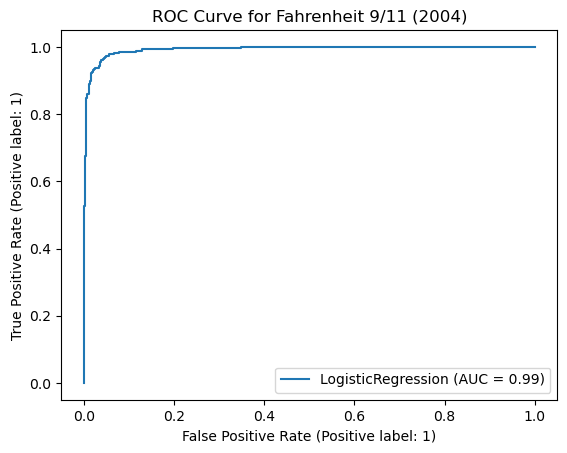

/Users/rannn/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rannn/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

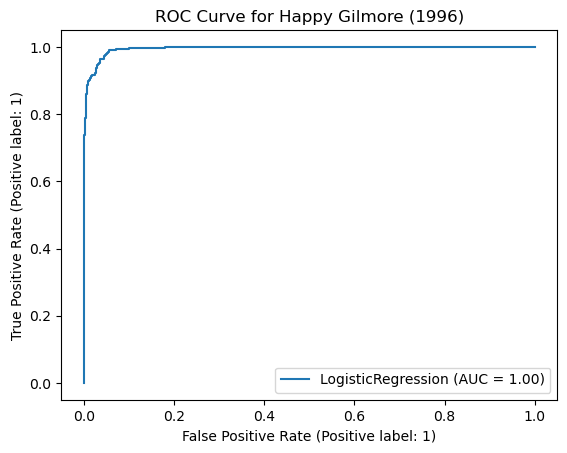

/Users/rannn/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rannn/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

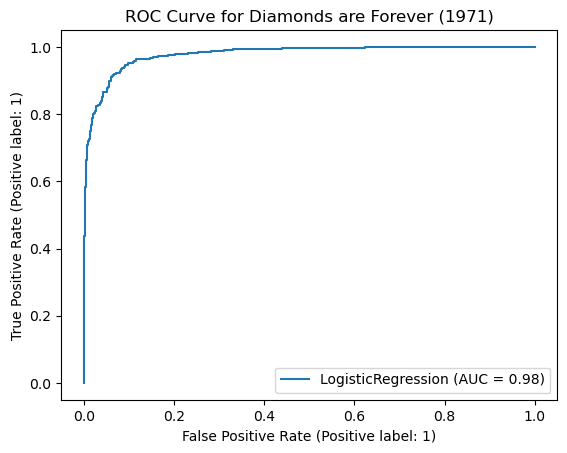

/Users/rannn/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/rannn/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

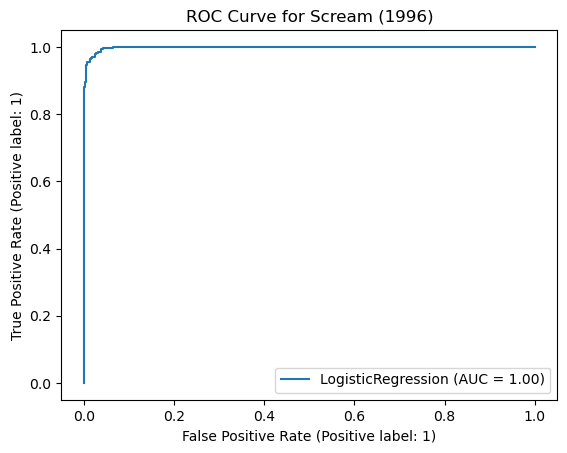

                         movie      beta       AUC
0       Fahrenheit 9/11 (2004)  0.102888  0.801058
1         Happy Gilmore (1996)  0.317246  0.831342
2  Diamonds are Forever (1971)  0.115364  0.806882
3                Scream (1996)  0.625835  0.839124


In [51]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is the original DataFrame and 'imputed_df' is the DataFrame with imputed values

# Step 1: Compute average movie enjoyment for each user using only real data
average_enjoyment = data.iloc[:, :400].mean(axis=1)

# Step 2: Sort movies by increasing rating using only real data
sorted_movies = data.iloc[:, :400].mean().sort_values()

# Step 3: Pick the 4 movies in the middle of the score range as target movies
middle_movies_indices = sorted_movies.iloc[198:202].index.tolist()

# Prepare a DataFrame for AUC values and betas
results_df = pd.DataFrame(columns=['Movie', 'Beta', 'AUC'])


# Get X
X = imputed_df.copy()
X = X.iloc[:,:400].drop(896)

movie_list = []
beta_list = []
AUC_list = []


# Step 4 & 5: For each target movie, prepare Y and build logistic regression models
for movie_name in middle_movies_indices:
    # Prepare Y using median split on imputed data
    # Using .loc since movie_name is a column label
    Y = (X[movie_name] > X[movie_name].median()).astype(int)

    log_reg = LogisticRegression()

    # Cross-validation to avoid overfitting
    auc_scores = cross_val_score(log_reg, X, Y, cv=5, scoring='roc_auc')
    mean_auc = np.mean(auc_scores)

    # Fit the model to the entire data
    log_reg.fit(X, Y)
    beta = log_reg.coef_[0][0]

    # Append results
    movie_list.append(movie_name)
    beta_list.append(beta)
    AUC_list.append(mean_auc)

    # Step 6: Plot ROC Curve
    RocCurveDisplay.from_estimator(log_reg, X, Y)
    plt.title(f'ROC Curve for {movie_name}')
    plt.show()

# Create a DataFrame using the lists
results_df = pd.DataFrame({
    'movie': movie_list,
    'beta': beta_list,
    'AUC': AUC_list
})
# Display the results
print(results_df)


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is the original DataFrame and 'imputed_df' is the DataFrame with imputed values

# Step 1: Compute average movie enjoyment for each user using only real data
average_enjoyment = data.iloc[:, :400].mean(axis=1)

# Step 2: Sort movies by increasing rating using only real data
sorted_movies = data.iloc[:, :400].mean().sort_values()

# Step 3: Pick the 4 movies in the middle of the score range as target movies
middle_movies_indices = sorted_movies.iloc[198:202].index.tolist()

# Prepare a DataFrame for AUC values and betas
results_df = pd.DataFrame(columns=['Movie', 'Beta', 'AUC'])


# Get X
X = imputed_df.copy()
X = X.iloc[:,:400].drop(896)

movie_list = []
beta_list = []
AUC_list = []


# Step 4 & 5: For each target movie, prepare Y and build logistic regression models
for movie_name in middle_movies_indices:
    # Prepare Y using median split on imputed data
    # Using .loc since movie_name is a column label
    Y = (X[movie_name] > X[movie_name].median()).astype(int)

    log_reg = LogisticRegression()
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    # Cross-validation to avoid overfitting
    auc_scores = cross_val_score(log_reg, X_train, Y_train, cv=5, scoring='roc_auc')
    mean_auc = np.mean(auc_scores)

    # Fit the model to the entire data
    log_reg.fit(X_train, Y_train)
    beta = log_reg.coef_[0][0]

    # Append results
    movie_list.append(movie_name)
    beta_list.append(beta)
    AUC_list.append(mean_auc)

    # Step 6: Plot ROC Curve
    # Calculate ROC curve and AUC
    Y_pred = log_reg.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(Y_test, y_pred)
    roc_auc = auc(fpr, tpr)

    # Plotting the ROC curve for the current movie
    plt.plot(fpr, tpr, label=f'ROC curve for {movie_name} (area = {roc_auc:.2f})')


# Create a DataFrame using the lists
results_df = pd.DataFrame({
    'movie': movie_list,
    'beta': beta_list,
    'AUC': AUC_list
})

# Finalizing the plot
plt.plot([0, 1], [0, 1], 'k--')  # Add a diagonal dashed line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves for Four Movies')
plt.legend(loc="lower right")
plt.show()
# Display the results
print(results_df)


In [37]:
data.iloc[896]

The Life of David Gale (2003)                                              NaN
Wing Commander (1999)                                                      NaN
Django Unchained (2012)                                                    NaN
Alien (1979)                                                               NaN
Indiana Jones and the Last Crusade (1989)                                  NaN
                                                                          ... 
Movies change my position on social economic or political issues           NaN
When watching movies things get so intense that I have to stop watching    NaN
Gender identity (1 = female; 2 = male; 3 = self-described)                 NaN
Are you an only child? (1: Yes; 0: No; -1: Did not respond)               -1.0
Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)        -1.0
Name: 896, Length: 477, dtype: float64

In [28]:
middle_movies_indices

['Fahrenheit 9/11 (2004)',
 'Happy Gilmore (1996)',
 'Diamonds are Forever (1971)',
 'Scream (1996)']

Extra Credit: Use machine learning methods of your choice to tell us something interesting and true about 
the movies in this dataset that is not already covered by the questions above [for an additional 5% of the 
grade score].

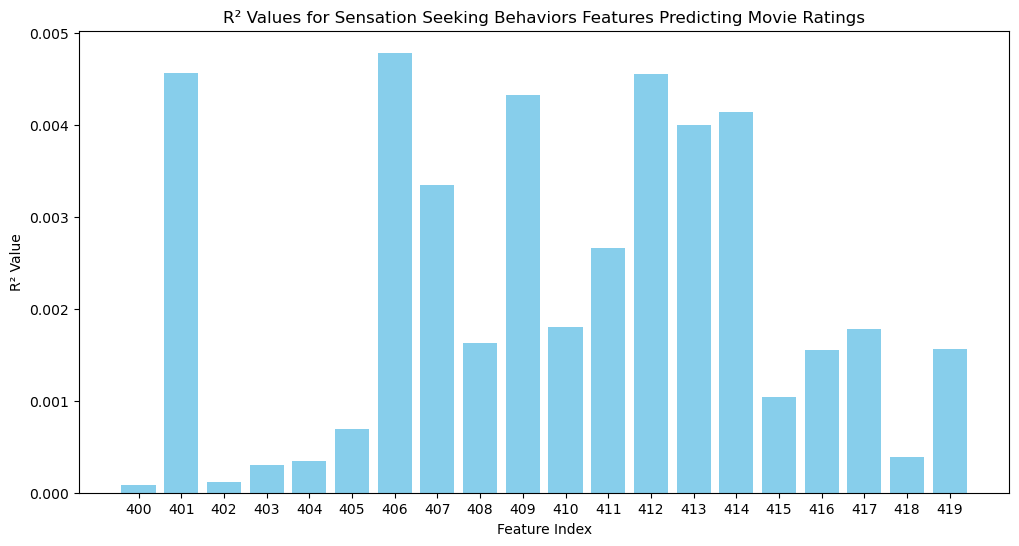

Top 5 Predictors:
Have you ever been rock climbing?
I enjoy rollercoasters 
Have you ever parachuted?
I enjoy watching horror movies
I had a sheltered upbringing

Last 5 Predictors:
I enjoy driving fast
Have you ever bungee-jumped?
I enjoy impulse shopping
I sometimes go out on weeknights even if I have work to do
Have you gambled or bet for money?


In [80]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Y = imputed_df.iloc[:, :400].mean(axis=1)

feature_indices = list(range(400, 420))
r2_values = []

for feature_index in feature_indices:
    X = imputed_df.iloc[:, feature_index].values.reshape(-1, 1)
    
    # Linear Regression Model
    model = LinearRegression().fit(X, Y)
    Y_pred = model.predict(X)
    r2 = r2_score(Y, Y_pred)

    r2_values.append(r2)

plt.figure(figsize=(12, 6))
plt.bar(feature_indices, r2_values, color='skyblue')
plt.xlabel('Feature Index')
plt.ylabel('R² Value')
plt.title('R² Values for Sensation Seeking Behaviors Features Predicting Movie Ratings')
plt.xticks(feature_indices)
plt.show()

top_5_indices = sorted(range(len(r2_values)), key=lambda i: r2_values[i], reverse=True)[:5]
top_5_feature_names = [imputed_df.columns[400+i] for i in top_5_indices]
print("Top 5 Predictors:")
for feature_name in top_5_feature_names:
    print(feature_name)

last_5_indices = sorted(range(len(r2_values)), key=lambda i: r2_values[i], reverse=False)[:5]
last_5_feature_names = [imputed_df.columns[400+i] for i in last_5_indices]
print("\nLast 5 Predictors:")
for feature_name in last_5_feature_names:
    print(feature_name)